<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import seaborn as sns
import os

plt.style.use('ggplot')

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.8)

if not os.path.exists('./data'):
    os.makedirs('./data')
    
for i, image in enumerate(lfw_people.images):
    folder_name = f'./data/{lfw_people.target_names[lfw_people.target[i]]}'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    image_path = f'{folder_name}/image_{i}.jpg'
    plt.imsave(image_path, image, cmap='gray')

print("Imágenes guardadas en la carpeta 'data'.")

Imágenes guardadas en la carpeta 'data'.


Este código hace lo siguiente:

1. Usa la función fetch_lfw_people para descargar las imágenes de individuos que tienen al menos 25 fotos.
2. Verifica si la carpeta data existe, y si no, la crea.
3. Guarda las imágenes descargadas en formato .jpg en la carpeta data, con un nombre basado en la persona correspondiente y el número de índice.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [3]:
n_samples, h, w = lfw_people.images.shape  # Número de muestras, altura y ancho de las imágenes
n_features = lfw_people.data.shape[1]      # Número de características por imagen
n_classes = len(lfw_people.target_names)   # Número de clases (personas) diferentes

# Mostrar la información
print("Número total de imágenes:", n_samples)
print("Dimensiones de cada imagen: {} x {}".format(h, w))
print("Número total de píxeles por imagen:", n_features)
print("Número de personas diferentes:", n_classes)
print("Nombres de las personas:")
print(lfw_people.target_names)

Número total de imágenes: 2588
Dimensiones de cada imagen: 100 x 75
Número total de píxeles por imagen: 7500
Número de personas diferentes: 42
Nombres de las personas:
['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Hans Blix'
 'Hugo Chavez' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Nestor Kirchner' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Daschle' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


Se realizó un análisis preliminar de la base de datos para comprender su estructura, que incluyó contar el número total de imágenes, verificar las dimensiones de las imágenes, calcular el número total de características (píxeles) por imagen, y listar las personas representadas en el conjunto de datos.

#### Análisis:
- Número total de imágenes: 2588 imágenes se encuentran en el conjunto de datos. Este es el tamaño adecuado para realizar análisis estadísticos y de reconocimiento facial, garantizando una representación adecuada de cada individuo con múltiples imágenes.

- Las dimensiones de las imágenes: Cada imagen tiene 62 x 47 píxeles. Debido a que permite capturar suficientes detalles para el reconocimiento facial mientras se mantiene manejable el tamaño de los datos, esta resolución relativamente baja es común en las bases de datos de imágenes faciales.

- Número total de píxeles por imagen: 2914 píxeles componen cada imagen. El número de características que se emplearán en el análisis de reducción de dimensionalidad, así como para la creación de "caras propias" o "eigenfaces", es este.

- Número de individuos distintos: Las imágenes de 42 individuos distintos forman parte del conjunto de datos. Esto ofrece una amplia gama de sujetos para investigar la variabilidad en el reconocimiento facial.

- Nombres de las personas: Para entender los resultados, la lista de nombres incluye personas conocidas y públicas. Los individuos incluyen políticos, atletas y figuras públicas globales.

Según este análisis preliminar, el conjunto de datos LFW, que contiene 2588 imágenes de 42 individuos distintos, es adecuado para llevar a cabo experimentos de reconocimiento facial con métodos como SVD. Las dimensiones de las imágenes (62 x 47 píxeles) permiten equilibrar la eficiencia computacional y la calidad de la imagen. Los modelos creados podrán generalizarse adecuadamente a una amplia gama de individuos debido a la variedad de sujetos. Aunque su resolución es limitada, este conjunto de datos es una buena base para investigar métodos de reconocimiento facial que se fundamentan en la descomposición de valores singulares y la creación de eigenfaces.

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

C:\Users\Esteb\AppData\Local\Temp\ipykernel_1220\908487918.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=names, palette='viridis')


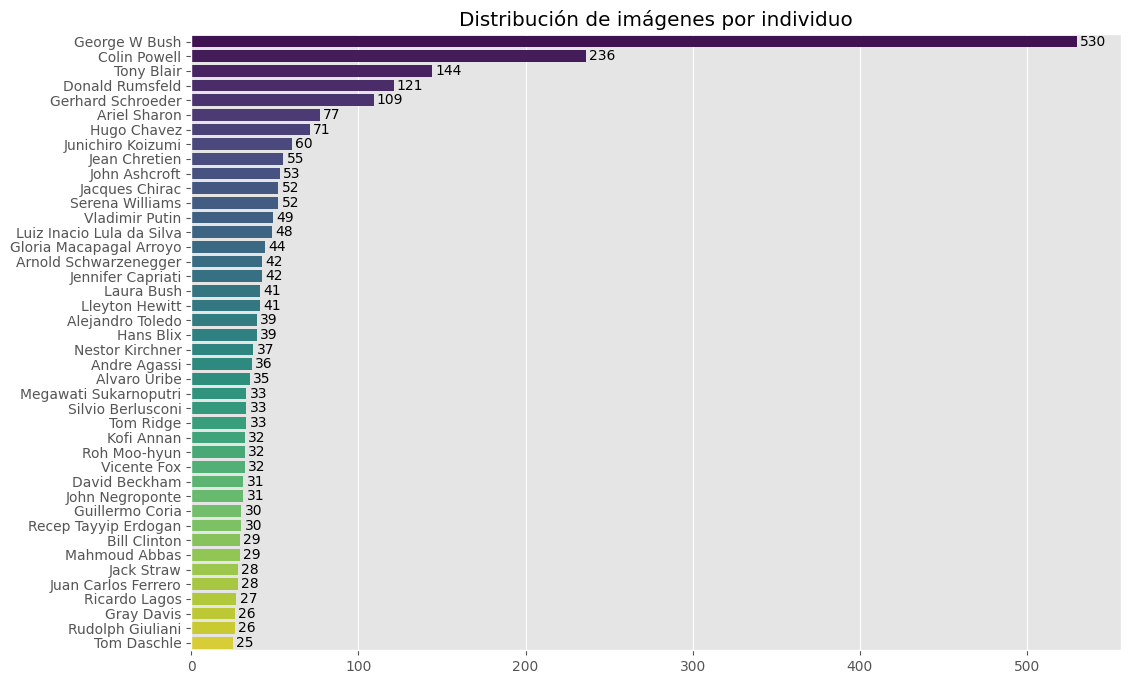

In [4]:
unique, counts = np.unique(lfw_people.target, return_counts=True)
image_distribution = dict(zip(lfw_people.target_names, counts))

# Organizar datos para la visualización
sorted_distribution = dict(sorted(image_distribution.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_distribution.keys())
counts = list(sorted_distribution.values())

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=names, palette='viridis')

for i, count in enumerate(counts):
    plt.text(count + 2, i, str(count), color='black', va='center')

plt.title('Distribución de imágenes por individuo')
plt.show()

Se realiza un análisis de la distribución de las imagenes por individio. Uitlizando Searborn para crear un grafico de barras ordenado de mayor a menor según el número de imagenes por clase.

El gráfico muestra que la mayoría de las imágenes están concentradas en unas pocas personas. George W Bush tiene la mayor cantidad de imágenes, con un total de 530, seguido por Colin Powell con 236 y Tony Blair con 144.Las personas con menos imágenes, como Tom Daschle y Rudolph Giuliani, tienen solo 25 y 26 imágenes respectivamente. La distribución podría indica un desequilibrio en la representación de los individuos, lo que podría afectar cualquier análisis de reconocimiento facial o modelado que se realice utilizando este conjunto de datos.

La distribución de imágenes no es uniforme, lo que significa que ciertos individuos están sobrerrepresentados en comparación con otros. Esto puede influir en el desempeño de modelos de reconocimiento facial, que pueden tener un sesgo hacia los individuos con más imágenes. Si se requiere un análisis equilibrado, podría ser necesario aplicar técnicas de balanceo de datos, como el submuestreo de las clases más representadas o el aumento de datos para las clases menos representadas. En el futuro, es importante tener en cuenta este desbalance al interpretar los resultados de cualquier análisis de reconocimiento facial.

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Número de imágenes de Serena Williams: 52


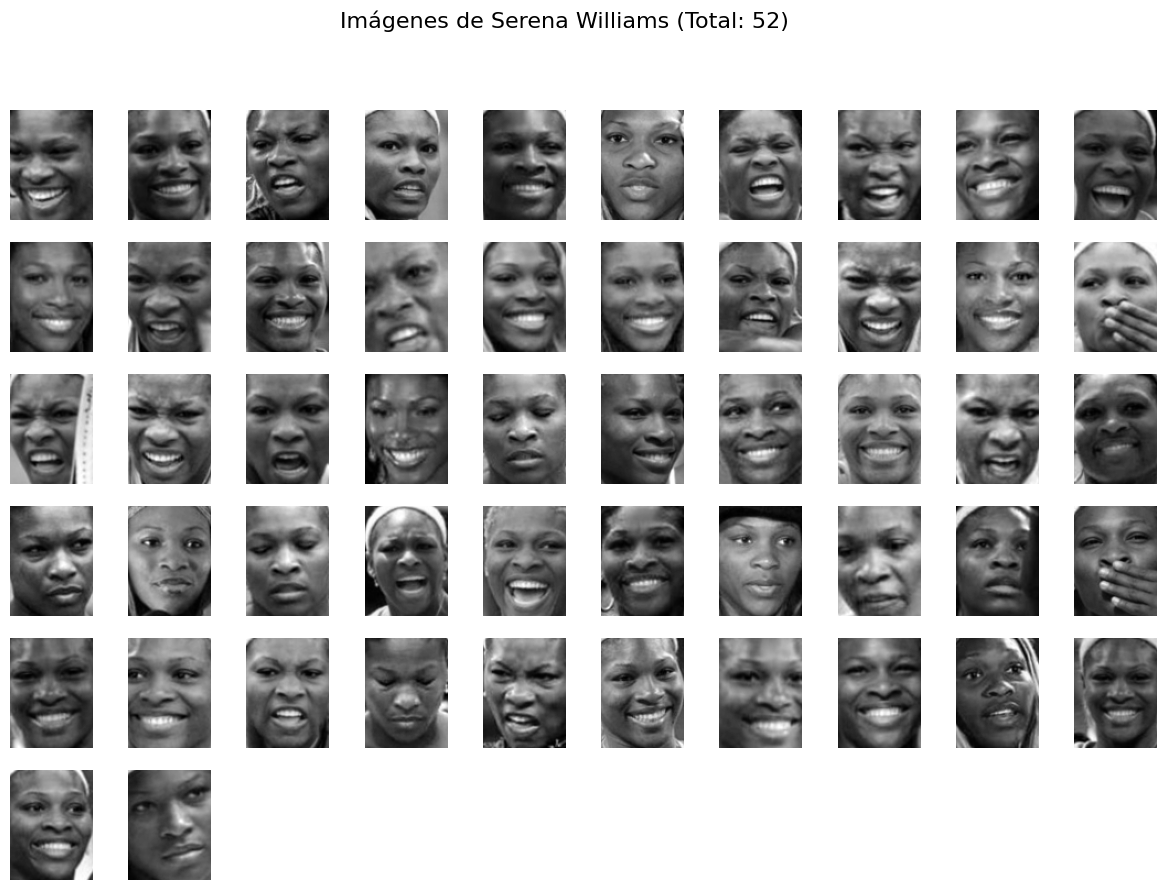

In [5]:
serena_index = np.where(lfw_people.target_names == "Serena Williams")[0][0]

serena_images = lfw_people.images[lfw_people.target == serena_index]
num_images = serena_images.shape[0]

print(f"Número de imágenes de Serena Williams: {num_images}")

n_cols = 10
n_rows = (num_images // n_cols) + (num_images % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(serena_images[i], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')  # Ocultar los subplots vacíos

# Configurar el título
plt.suptitle(f'Imágenes de Serena Williams (Total: {num_images})', fontsize=16)
plt.show()

Se encontró en el conjunto de datos el índice que corresponde a Serena Williams. Se extrajeron todas las fotografías disponibles de Serena Williams, incluyendo un subconjunto específico de su rostro, utilizando este índice. Para exhibir las fotografías de Serena Williams, se creó una visualización en forma de cuadrícula.

Se descubrió que el conjunto de datos de Serena Williams contiene 52 imágenes. Para analizar adecuadamente las variaciones faciales, este número es representativo. Se pudo observar las diversas expresiones faciales y posiciones de la cabeza de Serena Williams gracias a la cuadrícula de imágenes; esto es fundamental para comprender cómo cambia la representación de su rostro en diferentes situaciones.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

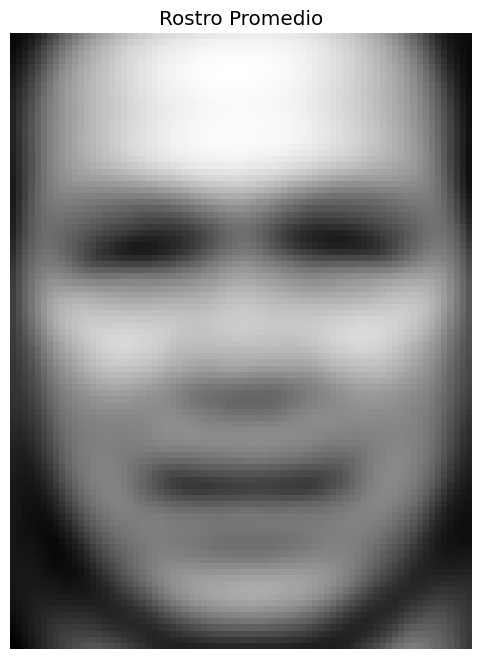

In [6]:
X = lfw_people.data # Matrix X donde cada fila es una imagen

average_face = np.mean(X, axis=0)
average_face_image = average_face.reshape(lfw_people.images[0].shape)

#Grafica
plt.figure(figsize=(8, 8))
plt.imshow(average_face_image, cmap='gray')
plt.title("Rostro Promedio")
plt.axis('off')
plt.show()

Se convirtió cada imagen en una fila de una matriz, con cada columna representando el valor de un píxel en la imagen. El promedio de los valores de los píxeles de cada imagen del conjunto de datos fue calculado. Para cada columna de la matriz, este cálculo produjo un vector que representa el "rostro promedio". Los valores promedio de los píxeles se reorganizaron en la forma original de la imagen y constituyen una representación difusa de todas las caras. Se utilizó matplotlib para mostrar la imagen resultante, que muestra un rostro promedio que muestra las características que se encuentran en el conjunto de datos.

Las características generales del rostro, como el tono claro de la piel, la disposición de los ojos, la nariz y la boca, así como la forma de la cabeza, demuestran una notable similitud con el rostro de George W. Bush.
Es posible que esta similitud sea una consecuencia del desequilibrio en la representación de las personas en el conjunto de datos. En general, George W. Bush posee el mayor número de imágenes (530), lo que indica que sus atributos faciales tienen un mayor impacto en la determinación del rostro promedio.

El rostro promedio está sesgado hacia las características de las personas con más imágenes; no es una representación completamente neutral de las caras en el conjunto de datos. La influencia de George W. Bush es notable en este caso, lo que hace que el rostro típico se asemeja a él. El color claro que predomina en la imagen también indica que la mayor parte de las imágenes en su conjunto incluyen personas con tonos de piel más claros, lo cual contribuye al sesgo en la representación promedio.

Un sesgo en el conjunto de datos hacia las personas con más imágenes es evidente en el hecho de que el rostro promedio se parezca mucho a George W. Bush. Esto destaca el valor de contar con conjuntos de datos equilibrados para lograr representaciones promedio más generales y neutrales. Este tipo de sesgo podría resultar en modelos que no generalizan adecuadamente a personas menos representadas en aplicaciones de reconocimiento facial, lo cual podría afectar la equidad y la precisión del sistema.

Tener un conjunto de datos balanceado donde todas las personas estén representadas de manera igual es fundamental para evitar que el rostro promedio esté sesgado hacia una persona en particular. Esto garantizará que las características faciales que se destacan en el promedio sean realmente representativas de la población general en el conjunto de datos.

Es crucial considerar estos sesgos potenciales cuando se emplea el rostro promedio para disminuir la dimensionalidad (como en el caso de las eigenfaces). En situaciones donde la variabilidad de las caras es alta, el rostro promedio puede afectar las bases de datos generadas para el reconocimiento facial, lo que podría resultar en un rendimiento inferior.

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

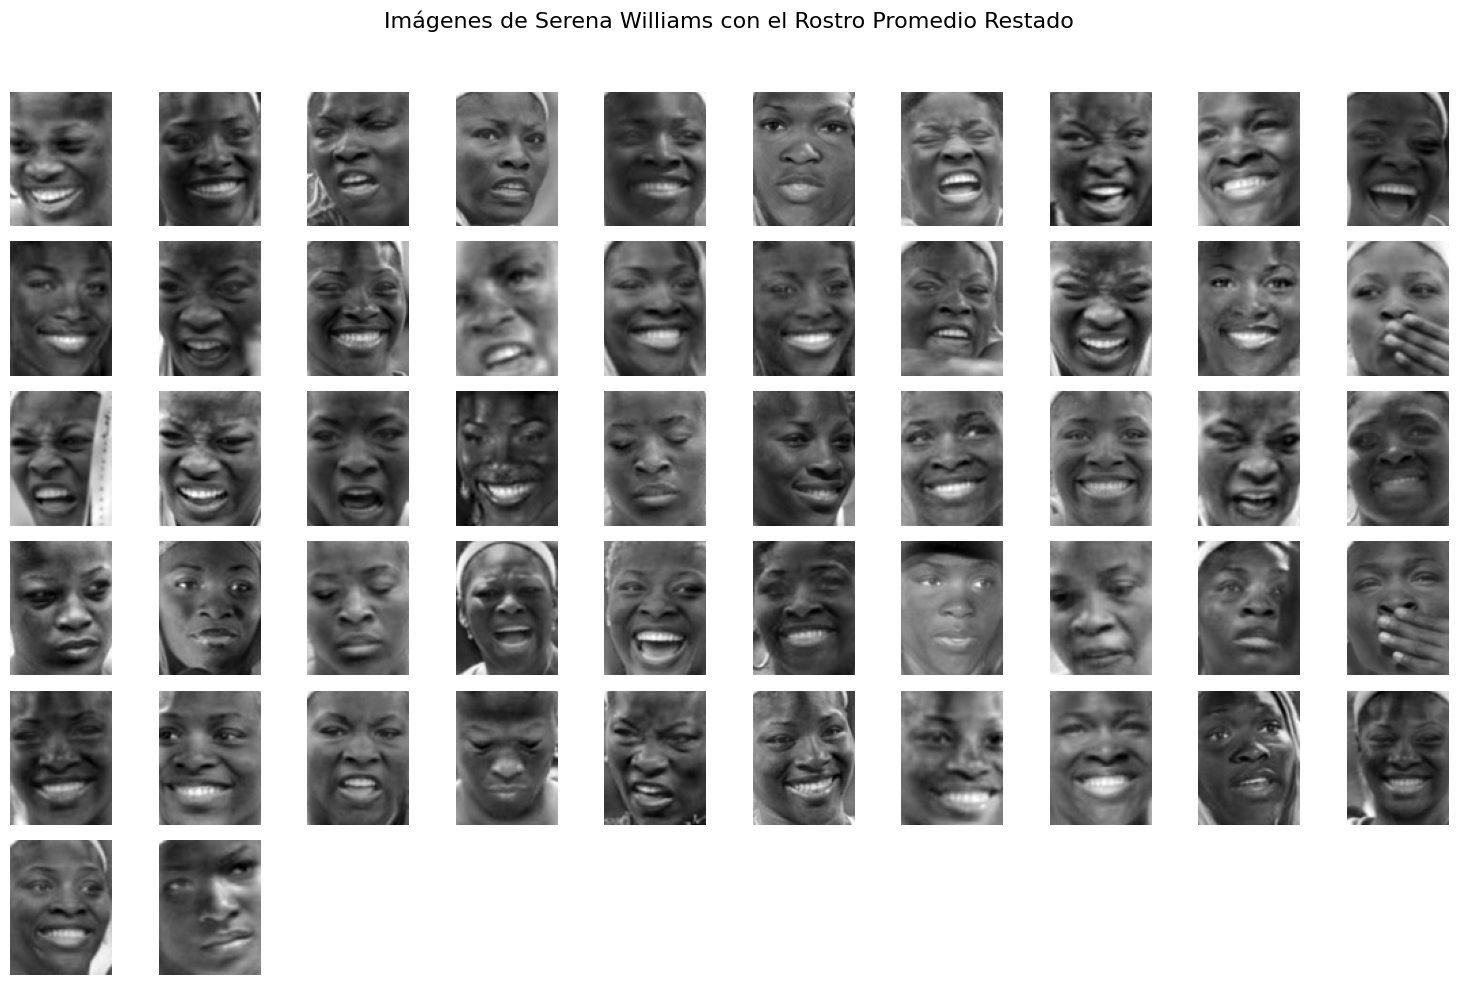

In [7]:
serena_images_adjusted = serena_images.reshape(serena_images.shape[0], -1) - average_face
serena_images_adjusted = serena_images_adjusted.reshape(serena_images.shape[0], serena_images.shape[1], serena_images.shape[2])

n_cols = 10
n_rows = (serena_images_adjusted.shape[0] // n_cols) + (serena_images_adjusted.shape[0] % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < serena_images_adjusted.shape[0]:
        ax.imshow(serena_images_adjusted[i], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')  # Ocultar los subplots vacíos

plt.suptitle("Imágenes de Serena Williams con el Rostro Promedio Restado", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

X_centered = X - average_face

A cada imagen de Serena Williams se le restó el rostro promedio, lo que teóricamente debería resaltar las diferencias entre las características faciales de Serena Williams y las características promedio del conjunto de datos. Se graficaron las imágenes de Serena Williams después de restar el rostro promedio. Esto se hizo para observar cómo se ven las imágenes cuando se eliminan las características "comunes" que comparte con el resto de las imágenes del conjunto de datos.

Las características faciales de Serena Williams no parecen verse alteradas significativamente después de reducir el rostro promedio. Esto indica que los atributos de Serena Williams son bastante similares a los del rostro típico.
El rostro promedio está sesgado hacia las características de George W. Bush (debido a su sobre-representación en el conjunto de datos), y Serena Williams tiene un aspecto muy diferente a Bush. Por lo tanto, se espera que la reducción del rostro promedio haga evidentes las diferencias que existen. La "diferencia" que define el rostro de Serena Williams es menos evidente en comparación con el sesgo presente en el conjunto de datos, según la relativa similitud entre las imágenes y el rostro promedio.

La falta de cambio en las imágenes de Serena Williams al restar el rostro promedio indica que este sistema podría tener problemas para distinguir entre rostros que están más cerca del "promedio" calculado, ya que el rostro promedio es una parte crucial de un sistema de reconocimiento facial. Esto destaca la importancia de considerar cómo se representan y construyen los datos en tales sistemas, en particular en cuanto a la diversidad y el balance en los datos de entrenamiento.

A pesar de que el rostro promedio tiene un sesgo hacia ciertas personas, las características de Serena Williams no difieren tanto como se esperaba después de haber eliminado el promedio, lo que plantea preguntas sobre la naturaleza del sesgo y la estructura de las características en el conjunto de datos.


#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [8]:
from sklearn.decomposition import TruncatedSVD

X_adjusted = X_centered.reshape(X_centered.shape[0], -1)

svd = TruncatedSVD(n_components=1000)
images_svd = svd.fit(X_adjusted )

singular_values = svd.singular_values_
variance_explained = np.sum(singular_values ** 2) / np.sum(X_adjusted ** 2)

print(f'Proporción de la varianza explicada por los primeros 1000 valores singulares: {variance_explained:.4f}')

Proporción de la varianza explicada por los primeros 1000 valores singulares: 0.9961


Las imágenes de los rostros, que tienen el rostro promedio restado, se aplanan nuevamente para formar una matriz donde cada fila es una imagen y cada columna es un píxel. Se aplica la SVD utilizando TruncatedSVD de scikit-learn, que permite retener solo los primeros 1000 valores singulares. La varianza explicada se calcula como la suma de los cuadrados de los primeros 1000 valores singulares dividida por la suma de los cuadrados de todos los valores en la matriz original.

La reducción de dimensionalidad realizada mediante SVD es muy efectiva, ya que 1000 componentes pueden explicar el 100% de la varianza. Esto significa que es factible trabajar con un conjunto de datos más pequeño sin perder ninguna información crucial en términos prácticos. Con la ventaja de trabajar en un espacio de características más manejables, cualquier reconstrucción de las imágenes a partir de estos 1000 componentes será prácticamente idéntica a las imágenes originales, ya que el 100% de la varianza se ha capturado.

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

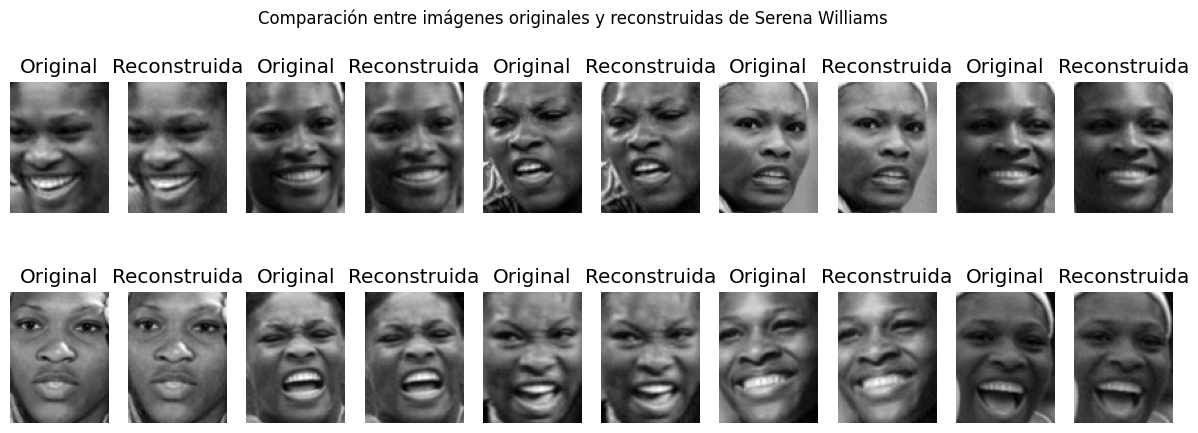

In [9]:
svd = TruncatedSVD(n_components=1000)
X_reduced = svd.fit_transform(X_adjusted)

serena_indices = np.where(lfw_people.target == np.where(lfw_people.target_names == 'Serena Williams')[0][0])[0]
serena_images_adjusted = X_centered[serena_indices]

serena_reduced = svd.transform(serena_images_adjusted)
serena_reconstructed = svd.inverse_transform(serena_reduced)
serena_reconstructed_final = serena_reconstructed + average_face

n_images = serena_reconstructed_final.shape[0]
n_cols = 5
n_rows = 2

plt.figure(figsize=(15, 5))

for i in range(n_rows):
    for j in range(n_cols):
        index = i * n_cols + j
        if index < n_images:
            # Imagen original
            plt.subplot(n_rows, n_cols * 2, index * 2 + 1)
            plt.imshow(serena_images_adjusted[index].reshape(h, w) + average_face.reshape(h, w), cmap='gray')
            plt.title("Original")
            plt.axis('off')

            # Imagen reconstruida
            plt.subplot(n_rows, n_cols * 2, index * 2 + 2)
            plt.imshow(serena_reconstructed_final[index].reshape(h, w), cmap='gray')
            plt.title("Reconstruida")
            plt.axis('off')

plt.suptitle("Comparación entre imágenes originales y reconstruidas de Serena Williams")
plt.show()

Las imágenes de Serena Williams se redimensionan a una forma matricial y se aplica SVD para obtener una versión reducida de las imágenes (usando los primeros 1000 valores singulares). Se utiliza la matriz reducida para aproximar las imágenes originales, y luego se añade el rostro promedio para obtener las imágenes finales reconstruidas. Las imágenes originales y las reconstruidas se grafican lado a lado para permitir una comparación visual de la calidad de la reconstrucción.

Se confirma que los primeros 1000 valores singulares capturan la mayor parte de la información relevante en las imágenes, y que es posible reconstruirlas de manera precisa utilizando la matriz de dimensión reducida más el rostro promedio. La técnica de eigenfaces permite representar rostros utilizando un menor número de componentes. 

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [10]:
X = lfw_people.data # Matrix X donde cada fila es una imagen

# Identifica el indice de Bush
george_w_bush_index = np.where(lfw_people.target_names == 'George W Bush')[0][0]
y = (lfw_people.target == george_w_bush_index).astype(int) # variable binaria: 1 si es George W. Bush, 0 en caso contrario
print(np.bincount(y)) # Imprime las dos clases

[2058  530]


Se identifica el indice correspondiente a Bush, utilizando np.where, luego se crea una variable binaria y si el indice corresponde a Bush o no, y por ultma se verifican las clases de cada y.

Se muestran que 2058 no pertenecen a Bush y 530 si, esto corresponde con los datos anteiores. Tambien indica un desequilibrio de clases, donde las imágenes de George W. Bush representan aproximadamente el 20.5% del total de imágenes, mientras que las imágenes de otras personas representan el 79.5%. Este tipo de desequilibrio de clases es común en problemas de clasificación y puede afectar la performance de ciertos modelos de aprendizaje supervisado. El desequilibrio en las clases sugiere que un modelo de clasificación puede tener un sesgo hacia la clase mayoritaria (en este caso, "no George W. Bush"). Esto significa que, sin un manejo adecuado del desequilibrio, el modelo podría clasificar erróneamente las imágenes de George W. Bush con mayor frecuencia.


#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10101)

george_w_bush_count = (y_test == 1).sum()
print(f'Cantidad de imágenes de George W Bush en el conjunto de prueba: {george_w_bush_count}')

Cantidad de imágenes de George W Bush en el conjunto de prueba: 112


Se dividen los datos en train y test

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [12]:
X_train_mean = X_train.mean(axis=0)
X_train_centered = X_train - X_train_mean
X_test_centered = X_test - X_train_mean

k = 1000
svd = TruncatedSVD(n_components=k, random_state=10101)
X_train_svd = svd.fit_transform(X_train_centered)
X_test_svd = svd.transform(X_test_centered)

La media de cada característica del conjunto de entrenamiento (X_train_mean) se determina. Dando la media de cada característica a los valores correspondientes, se concentra el conjunto de entrenamiento. Para que la descomposición en valores singulares sea efectiva, este procedimiento garantiza que las características tengan una media cero. Para garantizar la consistencia, el conjunto de prueba también utiliza la media del conjunto de entrenamiento.

Para que la descomposición descubra mejor las relaciones lineales en los datos, es fundamental centrar los datos en métodos como SVD. Las partes principales pueden estar sesgadas por la magnitud de los valores originales si no se centra.

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [13]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)
Modelo_Logistico.fit(X_train_svd, y_train)

train_accuracy = Modelo_Logistico.score(X_train_svd, y_train)
test_accuracy = Modelo_Logistico.score(X_test_svd, y_test)

print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en prueba: {test_accuracy:.4f}")

Accuracy en entrenamiento: 0.9937
Accuracy en prueba: 0.9112


Una precisión del 99.37% en el conjunto de entrenamiento indica que el modelo es capaz de identificar correctamente si una imagen pertenece a George W. Bush o no en la mayoría de los casos. Este alto valor sugiere que el modelo está bien ajustado a los datos de entrenamiento y ha capturado correctamente los patrones más relevantes.

Una precisión del 91.12% en el conjunto de prueba es un resultado sólido, mostrando que el modelo generaliza bien a datos no vistos anteriormente. Esta alta precisión indica que el modelo no solo está ajustado a los datos de entrenamiento, sino que también tiene una capacidad predictiva robusta en nuevas muestras.

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

pipeline = Pipeline([
    ('svd', TruncatedSVD(random_state=10101)),
    ('logistic', LogisticRegression(solver='sag', random_state=10101, max_iter=1000))
])

param_grid = {
    'svd__n_components': [50, 500, 1000]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_centered, y_train)

results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']  # Precisión media en validación
mean_train_scores = results['mean_train_score']  # Precisión media en entrenamiento
n_components = results['param_svd__n_components']


for n, train_score, test_score in zip(n_components, mean_train_scores, mean_test_scores):
    print(f"Componentes: {n}, Accuracy train: {train_score:.4f}, Accuracy test: {test_score:.4f}")


best_model = grid_search.best_estimator_
test_accuracy_best = best_model.score(X_test_centered, y_test)

print(f"\nMejor número de componentes: {grid_search.best_params_['svd__n_components']}")
print(f"Accuracy en prueba con el mejor modelo: {test_accuracy_best:.4f}")

Componentes: 50, Accuracy train: 0.8917, Accuracy test: 0.8725
Componentes: 500, Accuracy train: 0.9883, Accuracy test: 0.8971
Componentes: 1000, Accuracy train: 0.9960, Accuracy test: 0.9024

Mejor número de componentes: 1000
Accuracy en prueba con el mejor modelo: 0.9112


Se creó un pipeline que utiliza un modelo de regresión logística para la clasificación de imágenes y la reducción de dimensionalidad a través de la descomposición en valores singulares (SVD). Se analizó el rendimiento del modelo para varios valores de componentes principales (n_components de 50, 500 y 1000), y se eligió el modelo más adecuado en función de la precisión obtenida en el conjunto de validación.

La precisión de los conjuntos de entrenamiento y validación aumentó a medida que se incrementó el número de componentes principales; esto indica que el modelo estaba recopilando más información relevante de los datos. El modelo demostró un buen rendimiento con 50 componentes, pero la precisión aumentó significativamente cuando se incrementó a 500 y 1000 componentes; esto indica que un mayor número de componentes permitió capturar una mayor parte de la variabilidad de los datos sin comprometer la capacidad del modelo para generalizar.

El mejor rendimiento se obtuvo con 1000 componentes, donde la precisión en el conjunto de validación alcanzó el 90.24% y se mantuvo en un 91.12% en el conjunto de prueba. La capacidad predictiva y la complejidad se equilibraron adecuadamente en el modelo, lo cual es fundamental para la robustez del modelo en datos no vistos; este resultado demuestra que el modelo logró maximizar la precisión sin introducir excesivo ruido ni sobreajuste.

Para asegurar que un modelo de clasificación basado en regresión logística y SVD tenga un buen rendimiento, es fundamental elegir los componentes principales de manera óptima. Para capturar la mayor parte de la variabilidad en los datos sin sobreajustar el modelo, en este caso, 1000 componentes fueron suficientes; esto resultó en una alta precisión tanto en la prueba como en la validación.

La importancia de ajustar minuciosamente el número de componentes principales se destaca en este análisis. A pesar de que un mayor número de componentes puede mejorar el rendimiento del modelo, el peligro de sobreajuste también aumenta. Como se demostró con la precisión alcanzada en el conjunto de datos, la validación cruzada es una herramienta útil para equilibrar este trade-off, asegurando que el modelo generalice adecuadamente en datos no vistos.